# Predicting Heart Disease with Machine Learning 
This notebook builds a Machine Learning model to predict heart disease by using the 'heart_data.csv' dataset.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Retrival

In [2]:
df = pd.read_csv("heart_data.csv")
df.head()

,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up
0,74,Female,Urban,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,...,162,52,No,Abnormal,102.0,No,Yes,Ongoing,Yes,Irregular
1,68,Male,Urban,38.3,Yes,Yes,No,276.3,High,Healthy,...,150,97,No,Normal,186.9,Yes,No,Deceased,Yes,Regular
2,50,Male,Urban,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,...,98,67,Yes,Normal,71.4,No,Yes,Ongoing,No,NaN
3,29,Male,Urban,34.0,No,No,No,224.8,High,Healthy,...,99,87,No,Normal,191.0,No,No,Recovered,Yes,Regular
4,62,Male,Urban,25.1,No,No,No,128.0,Moderate,Healthy,...,128,89,No,Abnormal,184.1,Yes,No,Recovered,No,Irregular


In [3]:
df.shape

(399994, 25)

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399994 entries, 0 to 399993
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  399994 non-null  int64  
 1   Gender               399994 non-null  object 
 2   Region               399994 non-null  object 
 3   BMI                  399994 non-null  float64
 4   Smoker               399994 non-null  object 
 5   Diabetes             399994 non-null  object 
 6   Hypertension         399994 non-null  object 
 7   Cholesterol_Level    399994 non-null  float64
 8   Physical_Activity    399994 non-null  object 
 9   Diet                 399994 non-null  object 
 10  Family_History       399994 non-null  object 
 11  Stress_Level         399994 non-null  object 
 12  Alcohol_Consumption  399994 non-null  object 
 13  Drug_Use             399994 non-null  object 
 14  Sleep_Hours          399994 non-null  int64  
 15  Blood_Pressure   

We are leveraging a dataset of nearly 400k records, covering demographics, lifestyle, and clinical indicators. 
It includes both numerical (7) and categorical (18) features, providing a strong base for reliable ML. In preprocessing, we focus on the most important predictors while dropping post-diagnosis fields to ensure fairness and accuracy.

In [5]:
# Checking for null values
df.isnull().sum()

Age                         0
Gender                      0
Region                      0
BMI                         0
Smoker                      0
Diabetes                    0
Hypertension                0
Cholesterol_Level           0
Physical_Activity           0
Diet                        0
Family_History              0
Stress_Level                0
Alcohol_Consumption         0
Drug_Use                    0
Sleep_Hours                 0
Blood_Pressure              0
Heart_Rate                  0
Chest_Pain                  0
ECG_Results                 0
Blood_Sugar                 0
Angina                      0
Cardiac_Arrest              0
Recovery_Status             0
Medication                  0
Follow_Up              133631
dtype: int64

In [6]:
df.columns

Index(['Age', 'Gender', 'Region', 'BMI', 'Smoker', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Physical_Activity', 'Diet', 'Family_History',
       'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Sleep_Hours',
       'Blood_Pressure', 'Heart_Rate', 'Chest_Pain', 'ECG_Results',
       'Blood_Sugar', 'Angina', 'Cardiac_Arrest', 'Recovery_Status',
       'Medication', 'Follow_Up'],
      dtype='object')

In [7]:
df.describe()

,Age,BMI,Cholesterol_Level,Sleep_Hours,Blood_Pressure,Heart_Rate,Blood_Sugar
count,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000
mean,47.481772,27.532449,200.142307,6.498307,134.936457,85.022293,135.088672
std,19.070708,7.205656,57.785064,2.296341,26.228284,20.514181,37.468079
min,15.000000,15.000000,100.000000,3.000000,90.000000,50.000000,70.000000
25%,31.000000,21.300000,150.000000,4.000000,112.000000,67.000000,102.700000
50%,47.000000,27.500000,200.200000,6.000000,135.000000,85.000000,135.100000
75%,64.000000,33.800000,250.300000,9.000000,158.000000,103.000000,167.500000
max,80.000000,40.000000,300.000000,10.000000,180.000000,120.000000,200.000000


In [8]:
df[['Age','BMI','Cholesterol_Level','Sleep_Hours','Blood_Pressure','Heart_Rate','Blood_Sugar']].skew()

Age                  0.001235
BMI                 -0.004735
Cholesterol_Level   -0.002483
Sleep_Hours          0.001029
Blood_Pressure       0.004356
Heart_Rate          -0.000753
Blood_Sugar         -0.004643
dtype: float64

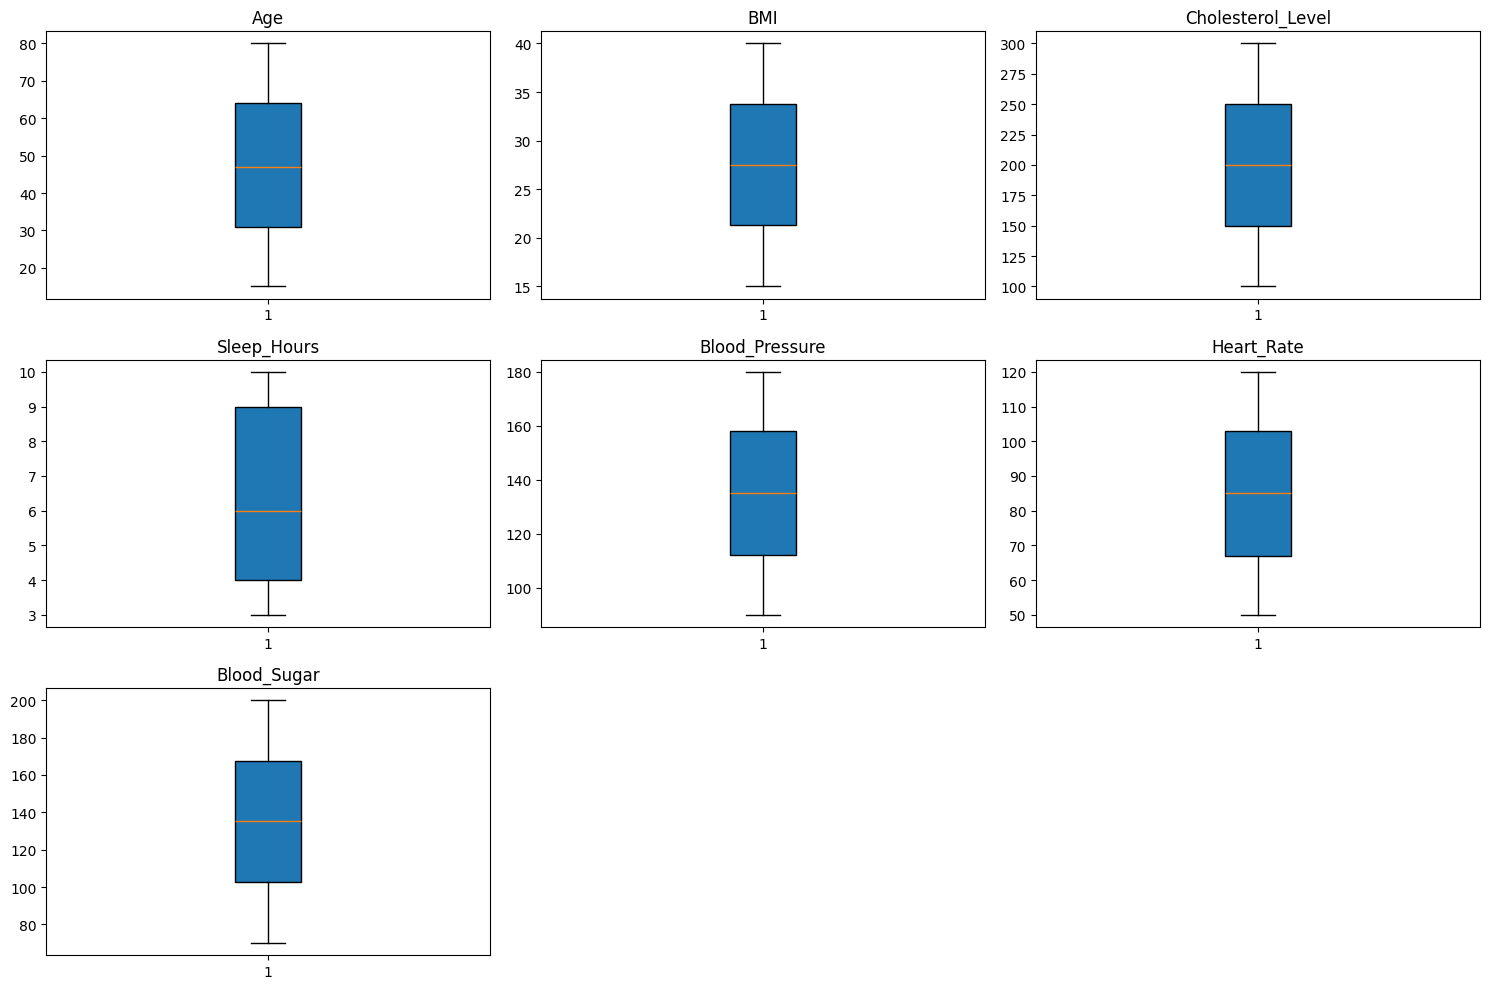

In [9]:
num_cols = [
    'Age', 'BMI', 'Cholesterol_Level', 
    'Sleep_Hours', 'Blood_Pressure', 
    'Heart_Rate', 'Blood_Sugar'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)   # 3x3 grid, position i
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Outlier Detection
We performed descriptive statistics, skewness checks, and boxplot analysis on the numerical features. The results indicate balanced distributions with no significant outliers, confirming the dataset’s robustness for reliable modeling.

### Correlation Analysis
We analyze feature correlations to identify relationships, multicollinearity, and patters with the target variable

In [10]:
df_num = df.select_dtypes(include='number')

In [11]:
# Without target
df_num.corr()

,Age,BMI,Cholesterol_Level,Sleep_Hours,Blood_Pressure,Heart_Rate,Blood_Sugar
Age,1.000000,0.003512,0.000455,0.002022,-0.001951,-0.000997,-0.002201
BMI,0.003512,1.000000,0.003156,0.004151,-0.003147,-0.000047,-0.000316
Cholesterol_Level,0.000455,0.003156,1.000000,0.004954,0.000738,0.002343,0.000786
Sleep_Hours,0.002022,0.004151,0.004954,1.000000,-0.002396,-0.004677,0.001060
Blood_Pressure,-0.001951,-0.003147,0.000738,-0.002396,1.000000,0.000896,-0.000442
Heart_Rate,-0.000997,-0.000047,0.002343,-0.004677,0.000896,1.000000,0.000074
Blood_Sugar,-0.002201,-0.000316,0.000786,0.001060,-0.000442,0.000074,1.000000


In [12]:
df['Cardiac_Arrest'].value_counts()

Cardiac_Arrest
Yes    200093
No     199901
Name: count, dtype: int64

In [13]:
df['Cardiac_Arrest'] = df['Cardiac_Arrest'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['Cardiac_Arrest'].value_counts()

Cardiac_Arrest
1    200093
0    199901
Name: count, dtype: int64

In [14]:
# With target
df_num_all = df.select_dtypes(include='number')
df_num_all.corr()

,Age,BMI,Cholesterol_Level,Sleep_Hours,Blood_Pressure,Heart_Rate,Blood_Sugar,Cardiac_Arrest
Age,1.000000,0.003512,0.000455,0.002022,-0.001951,-0.000997,-0.002201,-0.003528
BMI,0.003512,1.000000,0.003156,0.004151,-0.003147,-0.000047,-0.000316,-0.000622
Cholesterol_Level,0.000455,0.003156,1.000000,0.004954,0.000738,0.002343,0.000786,0.000017
Sleep_Hours,0.002022,0.004151,0.004954,1.000000,-0.002396,-0.004677,0.001060,0.001339
Blood_Pressure,-0.001951,-0.003147,0.000738,-0.002396,1.000000,0.000896,-0.000442,-0.000973
Heart_Rate,-0.000997,-0.000047,0.002343,-0.004677,0.000896,1.000000,0.000074,-0.002235
Blood_Sugar,-0.002201,-0.000316,0.000786,0.001060,-0.000442,0.000074,1.000000,0.001545
Cardiac_Arrest,-0.003528,-0.000622,0.000017,0.001339,-0.000973,-0.002235,0.001545,1.000000


We see that no single numeric feature alone is linearly predictive of heart attack. Risk prediction depends on the combination of features, particularly categorical variables such as Smoker, Diabetes, and Family History etc.

In [15]:
df.columns

Index(['Age', 'Gender', 'Region', 'BMI', 'Smoker', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Physical_Activity', 'Diet', 'Family_History',
       'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Sleep_Hours',
       'Blood_Pressure', 'Heart_Rate', 'Chest_Pain', 'ECG_Results',
       'Blood_Sugar', 'Angina', 'Cardiac_Arrest', 'Recovery_Status',
       'Medication', 'Follow_Up'],
      dtype='object')

In [16]:
# Display unique values for each categorical or object column
df_cat = df.select_dtypes(include=['object', 'category'])
for i,col in enumerate(df_cat,1):
    print(f"In {col} there is", df[col].unique())

    
          

In Gender there is ['Female' 'Male']
In Region there is ['Urban' 'Rural']
In Smoker there is ['Yes' 'No']
In Diabetes there is ['Yes' 'No']
In Hypertension there is ['Yes' 'No']
In Physical_Activity there is ['Moderate' 'High' 'Low']
In Diet there is ['Healthy' 'Unhealthy']
In Family_History there is ['Yes' 'No']
In Stress_Level there is ['High' 'Low' 'Moderate']
In Alcohol_Consumption there is ['Yes' 'No']
In Drug_Use there is ['No' 'Yes']
In Chest_Pain there is ['No' 'Yes']
In ECG_Results there is ['Abnormal' 'Normal']
In Angina there is ['No' 'Yes']
In Recovery_Status there is ['Ongoing' 'Deceased' 'Recovered']
In Medication there is ['Yes' 'No']
In Follow_Up there is ['Irregular' 'Regular' nan]


### Checking target distribution


Cardiac_Arrest
1    200093
0    199901
Name: count, dtype: int64


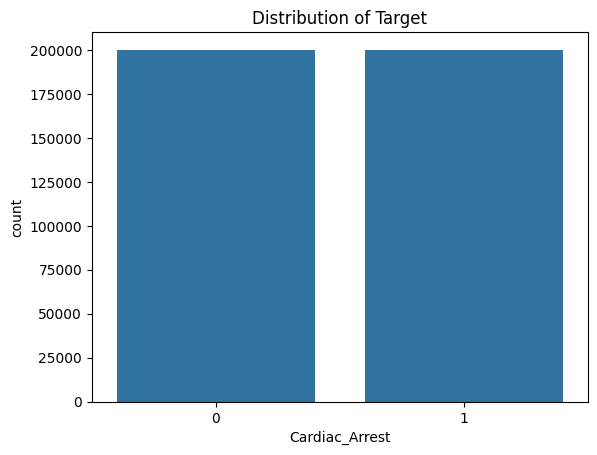

In [17]:
print(df['Cardiac_Arrest'].value_counts())

# Visualize
sns.countplot(x='Cardiac_Arrest', data=df)
plt.title("Distribution of Target")
plt.show()

<Axes: >

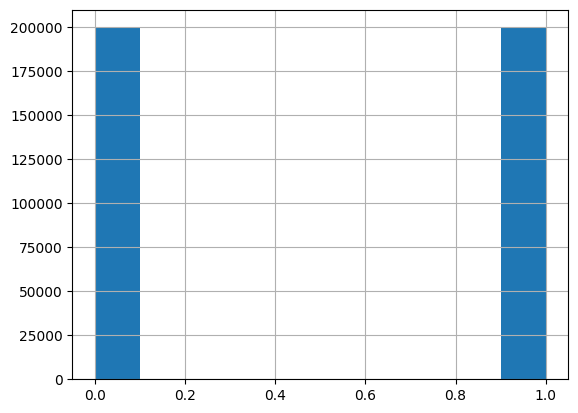

In [18]:
df['Cardiac_Arrest'].hist()

## Data Preprocessing

We are keeping the features that  are available at prediction time and are relevant.

In [19]:
df.columns

Index(['Age', 'Gender', 'Region', 'BMI', 'Smoker', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Physical_Activity', 'Diet', 'Family_History',
       'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Sleep_Hours',
       'Blood_Pressure', 'Heart_Rate', 'Chest_Pain', 'ECG_Results',
       'Blood_Sugar', 'Angina', 'Cardiac_Arrest', 'Recovery_Status',
       'Medication', 'Follow_Up'],
      dtype='object')

In [20]:
df = df.drop(columns=['Follow_Up','Medication','Recovery_Status','Angina','Heart_Rate','Chest_Pain','ECG_Results','Drug_Use', 'Region'])

In [21]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoker', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Physical_Activity', 'Diet', 'Family_History',
       'Stress_Level', 'Alcohol_Consumption', 'Sleep_Hours', 'Blood_Pressure',
       'Blood_Sugar', 'Cardiac_Arrest'],
      dtype='object')

In [22]:
# Converting all categorical features to category dtype before passing to a pipeline:
cat_cols = ['Gender', 'Smoker', 'Diabetes', 'Hypertension', 
            'Physical_Activity', 'Diet', 'Family_History', 
            'Stress_Level', 'Alcohol_Consumption']

for col in cat_cols:
    df[col] = df[col].astype('category')

In [23]:
#  Split dataset into training and test sets 
from sklearn.model_selection import train_test_split

# Suppose 'Cardiac_Arrest' is your target
X = df.drop('Cardiac_Arrest', axis=1)
y = df['Cardiac_Arrest']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Model Traning

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

num_features = ['Age', 'BMI', 'Cholesterol_Level', 'Sleep_Hours', 
                'Blood_Pressure', 'Blood_Sugar']

cat_features =['Gender', 'Smoker', 'Diabetes', 'Hypertension', 
            'Physical_Activity', 'Diet', 'Family_History', 
            'Stress_Level', 'Alcohol_Consumption']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [25]:
model = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(
    n_estimators=450,
    max_depth=18,
    min_samples_split=15,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    oob_score=True,
    n_jobs=-1,
    random_state=42
))
])

model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Evaluation

In [26]:
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities (useful for ROC, AUC)
y_prob = model.predict_proba(X_test)[:, 1]


In [27]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, RocCurveDisplay
)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, Recall, F1
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8512606407580094
Confusion Matrix:
 [[33891  5869]
 [ 6030 34209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     39760
           1       0.85      0.85      0.85     40239

    accuracy                           0.85     79999
   macro avg       0.85      0.85      0.85     79999
weighted avg       0.85      0.85      0.85     79999

ROC-AUC: 0.9255096903896601


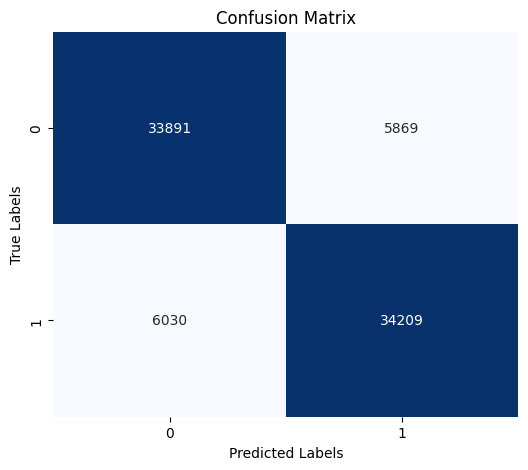

In [28]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
print("OOB Accuracy:", model.named_steps['classifier'].oob_score_)

OOB Accuracy: 0.8289817028391069


In [30]:
# For Probability-based risk communication 
# Calibrated model
from sklearn.calibration import CalibratedClassifierCV

# model is my trained RandomForestClassifier
calibrated_rf = CalibratedClassifierCV(model, cv=5, method='isotonic')
calibrated_rf.fit(X_train, y_train)

probs = calibrated_rf.predict_proba(X_test)[:, 1]


In [32]:
import joblib
# Save the model
joblib.dump(calibrated_rf, 'cardiac_arrest_model.pkl')

['cardiac_arrest_model.pkl']

## Conclusion
The final Random Forest model achieved 85% accuracy, with a ROC-AUC of 0.926, and precision/recall around 0.85 for both classes. The OOB accuracy of 0.829 indicates good generalization with minimal overfitting. The confusion matrix confirmed balanced predictions across cardiac arrest and non-cardiac arrest cases.

To further improve reliability, we applied probability calibration (isotonic calibration), ensuring that predicted risk scores better reflect true outcome probabilities. This makes the model not only accurate in classification but also trustworthy in risk estimation.

Overall, the calibrated model captures key risk factors effectively and is suitable for real-world deployment to assess cardiac arrest risk.